Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.8662 - loss: 0.6517 - val_accuracy: 0.7692 - val_loss: 0.5466
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8454 - loss: 0.4725 - val_accuracy: 0.7692 - val_loss: 0.5683
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8558 - loss: 0.4060 - val_accuracy: 0.7692 - val_loss: 0.6490
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8558 - loss: 0.3964 - val_accuracy: 0.7692 - val_loss: 0.6407
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8454 - loss: 0.3875 - val_accuracy: 0.7692 - val_loss: 0.5899
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8349 - loss: 0.3781 - val_accuracy: 0.7692 - val_loss: 0.5565
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8558 - loss: 0.3275 - val_accuracy: 0.7692 - val_loss: 0.5494
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8349 - loss: 0.3348 - val_accuracy: 0.7692 - val_loss: 0.5545
Epoch 9/

Test Accuracy: 76.92%


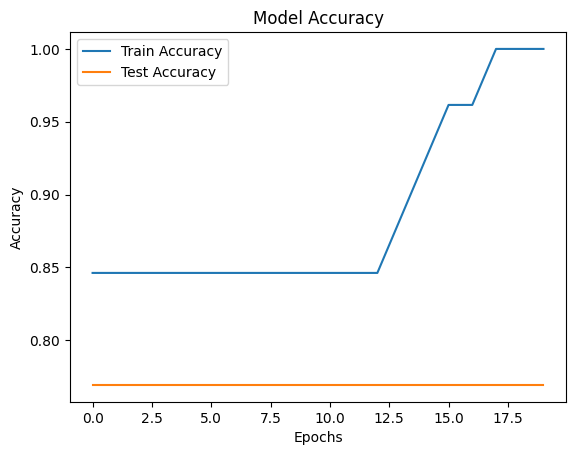

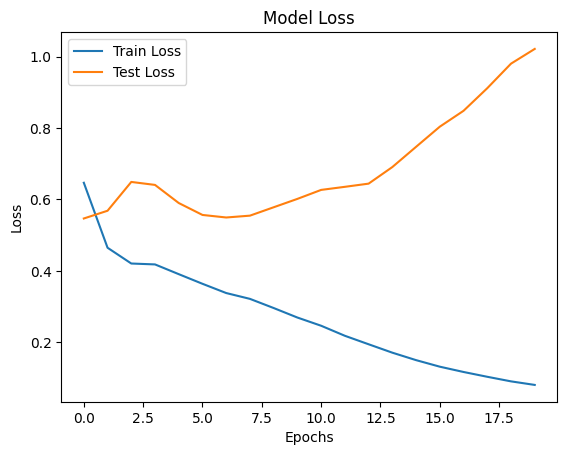

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the preprocessed dataset
ipo_df = pd.read_csv('preprocessed_ipo_data_updated.csv')

# Split dataset into features (X) and target (y)
X = ipo_df.drop(columns=['Target'])
y = ipo_df['Target']

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = Sequential()

# Input layer (the input shape should match the number of features in X)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (since it's binary classification, use a sigmoid activation function)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Save the model for future use
model.save('ipo_classification_model.h5')

# Optionally, plot the training history (optional)
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


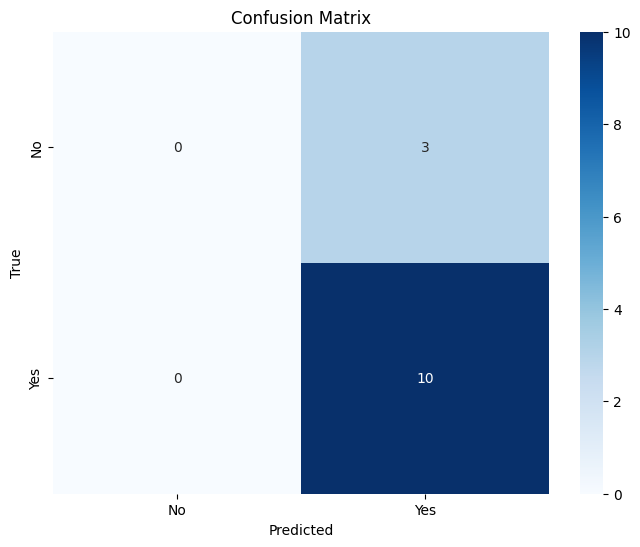

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report for precision, recall, f1-score, and support
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)


              precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.77      1.00      0.87        10

    accuracy                           0.77        13
   macro avg       0.38      0.50      0.43        13
weighted avg       0.59      0.77      0.67        13



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "the sky is blue",
    "the sun is bright",
    "the sun in the sky is bright",
    "we can see the shining sun, the bright sun"
]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (i.e., words)
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to array for inspection
dense = tfidf_matrix.todense()

# Print TF-IDF scores
for doc_idx, doc in enumerate(dense):
    print(f"\nDocument {doc_idx + 1}")
    for word_idx, score in enumerate(doc.tolist()[0]):
        if score > 0:
            print(f"{feature_names[word_idx]}: {score:.4f}")



Document 1
blue: 0.6592
is: 0.4208
sky: 0.5197
the: 0.3440

Document 2
bright: 0.5221
is: 0.5221
sun: 0.5221
the: 0.4269

Document 3
bright: 0.3218
in: 0.5042
is: 0.3218
sky: 0.3975
sun: 0.3218
the: 0.5263

Document 4
bright: 0.2391
can: 0.3746
see: 0.3746
shining: 0.3746
sun: 0.4782
the: 0.3910
we: 0.3746


In [ ]:
final_df

,Issue Price,Target,Recommendation,Nifty_Change_1w,Nifty_Change_1m,Nifty_Change_3m,word_1,word_1_vec_0,word_1_vec_1,word_1_vec_2,...,word_10_vec_40,word_10_vec_41,word_10_vec_42,word_10_vec_43,word_10_vec_44,word_10_vec_45,word_10_vec_46,word_10_vec_47,word_10_vec_48,word_10_vec_49
0,152,No,Apply,-3.038156,0.647831,2.831313,paper,-0.71216,0.028648,0.14848,...,-0.013749,-0.117660,0.744830,0.033933,1.308800,0.274840,-0.466420,0.43517,-0.031155,0.007575
1,65,No,Apply,-3.932841,-0.226944,1.483845,company,0.62583,-0.577030,0.41163,...,-0.792010,0.149050,-0.188530,0.155330,-0.326530,0.319250,0.611950,0.80472,0.207000,0.569970
2,66,No,May apply,3.148632,4.789802,9.185323,company,0.62583,-0.577030,0.41163,...,0.137920,-0.363760,-0.005039,0.312290,-0.728390,-0.016576,-0.457360,0.53253,-0.287560,0.221470
3,291,No,Apply,-0.054771,8.318643,8.748535,company,0.62583,-0.577030,0.41163,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,505,No,Apply,-3.910629,-4.106085,-4.015060,gas,0.47911,-0.016612,1.41900,...,0.529440,-0.199530,-0.416050,0.448580,0.367760,0.359000,-0.059185,-0.50873,-0.568840,-0.921860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,111,Yes,Avoid,1.062519,6.245962,12.893805,company,0.62583,-0.577030,0.41163,...,1.572900,-0.265000,-0.222600,0.682990,-0.300860,0.199010,0.060389,0.63221,0.216750,0.461940
61,74,Yes,May apply,0.956287,5.774289,11.650004,company,0.62583,-0.577030,0.41163,...,-0.652060,-0.013762,0.349650,0.030161,0.825820,0.254930,0.088389,0.38069,0.842020,0.381850
62,900,Yes,Apply,2.348732,3.623056,9.477636,company,0.62583,-0.577030,0.41163,...,-0.490090,-0.233050,0.449560,-0.709540,-0.093103,-0.570260,-0.174240,0.59070,-0.542110,0.995650
63,55,Yes,Avoid,-0.037301,0.082282,9.014601,company,0.62583,-0.577030,0.41163,...,-0.722370,-0.471750,-0.243310,-1.428500,-0.619720,0.144190,-0.325520,-0.62334,0.124120,-0.040170


In [ ]:
import nltk

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load dataset
ipo_df = pd.read_csv('/content/final_ipo_list_with_nifty_changes.csv')
ipo_df = ipo_df.drop(columns=['Unnamed: 0', 'Name', 'Listing Date', 'Listing Price',
                              'LTP', 'Returns from issue price', 'Delta', 'Clean_Name'])

# Define answer columns
answer_columns = [
    'answer_of_question_3', 'answer_of_question_7', 'answer_of_question_8',
    'answer_of_question_9', 'answer_of_question_10', 'answer_of_question_11',
    'answer_of_question_12', 'answer_of_question_14'
]

# NLP preprocessing function
stop_words = set(stopwords.words('english'))
def clean_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalpha()]  # remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Process each answer column independently
for col in answer_columns:
    # Clean text
    cleaned_col = f'{col}_cleaned'
    ipo_df[cleaned_col] = ipo_df[col].fillna('').apply(clean_text)

    # Apply TF-IDF to the cleaned column
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(ipo_df[cleaned_col])
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Extract top 15 words and scores
    def get_top_words_and_vectors(row_idx):
        row = tfidf_matrix[row_idx].toarray().flatten()
        top_indices = row.argsort()[-15:][::-1]  # highest scores
        words = feature_names[top_indices]
        vectors = row[top_indices]
        return words.tolist(), vectors.tolist()

    results = [get_top_words_and_vectors(i) for i in range(tfidf_matrix.shape[0])]

    # Add new columns for top words and vectors
    ipo_df[f'{col}_top_15_words'] = [r[0] for r in results]
    ipo_df[f'{col}_top_15_vectors'] = [r[1] for r in results]


In [ ]:
ipo_df.head()

,Issue Price,Target,answer_of_question_3,answer_of_question_7,answer_of_question_8,answer_of_question_9,answer_of_question_10,answer_of_question_11,answer_of_question_12,answer_of_question_14,...,answer_of_question_10_top_15_vectors,answer_of_question_11_cleaned,answer_of_question_11_top_15_words,answer_of_question_11_top_15_vectors,answer_of_question_12_cleaned,answer_of_question_12_top_15_words,answer_of_question_12_top_15_vectors,answer_of_question_14_cleaned,answer_of_question_14_top_15_words,answer_of_question_14_top_15_vectors
0,152,No,The company will utilize the funds raised thro...,"Yes, there are regulatory issues and conflicts...","Based on the provided content, the company's p...","Based on the provided content, here are the an...",The potential risks associated with increasing...,"Based on the provided content, the company's v...",The competitive landscape of the industry in w...,The lead managers for the IPO are Gretex Corpo...,...,"[0.19641796675889323, 0.19641796675889323, 0.1...",based provided content company valuation compa...,"[cmp, per, share, company, limited, price, iss...","[0.3331831786854437, 0.32696700573718673, 0.32...",competitive landscape industry company operate...,"[opportunities, paper, threats, packaging, div...","[0.3175937158906257, 0.250315931519494, 0.2503...",lead managers ipo gretex corporate services li...,"[gretex, corporate, services, nadu, tamil, lim...","[0.4953838620144606, 0.4425724397324475, 0.299..."
1,65,No,The company proposes to utilize the funds rais...,"Yes, there are several regulatory issues and c...",The company's plans for expansion and future g...,"Based on the provided content, the following i...",The company faces potential risks associated w...,"Based on the provided content, the company's v...",The competitive landscape of the industry in w...,"Unfortunately, the provided content does not m...",...,"[0.2976550950790444, 0.2583947489652773, 0.234...",based provided content company valuation appea...,"[range, company, financial, nav, including, ra...","[0.3059135730448878, 0.2966674872188848, 0.246...",competitive landscape industry company operate...,"[quality, accommodation, properties, room, org...","[0.19528287461870372, 0.17213436312511238, 0.1...",unfortunately provided content mention names l...,"[corpwis, platform, emerge, nse, listing, pric...","[0.28186286001240934, 0.25644634431787444, 0.2..."
2,66,No,The company will utilize the funds raised thro...,"Yes, there are several regulatory issues and c...","Based on the provided content, the company's p...",Based on the provided Red Herring Prospectus (...,The potential risks associated with increasing...,The company's valuation comparison with its pe...,The competitive landscape of the industry in w...,The lead managers and registrar for the IPO ar...,...,"[0.3075708891226358, 0.2697104632950668, 0.219...",company valuation comparison peers provided ta...,"[relatively, limited, ratio, highest, company,...","[0.2269409362937917, 0.22016879468016232, 0.20...",competitive landscape industry company operate...,"[intricate, market, giants, prominence, web, n...","[0.3828790973991336, 0.20721901893851996, 0.19...",lead managers registrar ipo explicitly mention...,"[company, officer, appointed, compliance, rela...","[0.3633680218431932, 0.34351235623909726, 0.30..."
3,291,No,"Unfortunately, the provided content does not m...","Yes, there are regulatory issues and conflicts...",The company's plans for expansion and future g...,"Based on the provided content, the following i...",None. The provided content does not mention an...,"Based on the provided content, the company's v...",NaN,"The lead managers for the IPO are I-Sec, Axis ...",...,"[0.2794195519397672, 0.26302597760495655, 0.24...",based provided content company valuation appea...,"[bank, small, finance, limited, company, line,...","[0.27945611955690136, 0.27945611955690136, 0.2...",,"[abilities, zone, yet, years, year, yardstick,...","[0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming stopwords and GloVe path are already set
stop_words = set(stopwords.words('english'))

# Load GloVe 50D embeddings
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings

glove_path = '/content/glove.6B.50d.txt'  # Make sure this file is in your directory
glove_model = load_glove_model(glove_path)

# Load your dataset
ipo_df = pd.read_csv('final_ipo_list_with_nifty_changes.csv')
ipo_df = ipo_df.drop(columns=['Unnamed: 0', 'Name', 'Listing Date', 'Listing Price',
                              'LTP', 'Returns from issue price', 'Delta', 'Clean_Name'])

# Text columns
answer_columns = [
    'answer_of_question_3', 'answer_of_question_7', 'answer_of_question_8',
    'answer_of_question_9', 'answer_of_question_10', 'answer_of_question_11',
    'answer_of_question_12', 'answer_of_question_14'
]

# Text cleaning function
def clean_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

# Combine all answers into one and clean
ipo_df['combined_answers'] = ipo_df[answer_columns].fillna('').agg(' '.join, axis=1)
ipo_df['cleaned_text'] = ipo_df['combined_answers'].apply(clean_text)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(ipo_df['cleaned_text'])
feature_names = np.array(vectorizer.get_feature_names_out())

# Prepare output container
word_cols_data = {}
tfidf_cols_data = {}

for row_idx in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[row_idx].toarray().flatten()
    top_indices = row.argsort()[-10:][::-1]  # Get indices of the top 10 words
    top_words = feature_names[top_indices]
    top_tfidf_values = row[top_indices]  # Corresponding TF-IDF values

    for i in range(10):
        word_col = f"word_{i+1}"
        vector_cols = [f"word_{i+1}_vec_{j}" for j in range(50)]  # 50-dimensional vector columns
        tfidf_col = f"word_{i+1}_tfidf"

        word = top_words[i] if i < len(top_words) else ''
        word_cols_data.setdefault(word_col, []).append(word)
        tfidf_cols_data.setdefault(tfidf_col, []).append(top_tfidf_values[i])

        if word in glove_model:
            vec = glove_model[word]
        else:
            vec = np.zeros(50)  # If word is not in GloVe model, use a zero vector

        for j, val in enumerate(vec):
            word_cols_data.setdefault(vector_cols[j], []).append(val)

# Convert word_cols_data and tfidf_cols_data to DataFrames
embedding_df = pd.DataFrame(word_cols_data)
tfidf_df = pd.DataFrame(tfidf_cols_data)

# Drop word columns (if necessary)
embedding_cols_to_drop = [f'word_{i+1}' for i in range(10)]  # Columns like 'word_1', 'word_2', etc.
embedding_df = embedding_df.drop(columns=embedding_cols_to_drop)

# Combine original dataset (excluding original answer columns and text columns) with the embedding and TF-IDF columns
final_df = pd.concat([ipo_df.drop(columns=answer_columns + ['combined_answers', 'cleaned_text']).reset_index(drop=True),
                       embedding_df, tfidf_df], axis=1)

# One-Hot Encoding for 'Recommendation' column using the correct keyword argument
ohe = OneHotEncoder(sparse_output=False)  # Correct argument for sparse=False in recent scikit-learn versions
recommendation_encoded = ohe.fit_transform(final_df[['Recommendation']])
recommendation_df = pd.DataFrame(recommendation_encoded, columns=ohe.categories_[0])

# Drop the original 'Recommendation' column after encoding
final_df = final_df.drop(columns=['Recommendation'])

# Add the one-hot encoded 'Recommendation' columns
final_df = pd.concat([final_df, recommendation_df], axis=1)

# Standardizing and Normalizing numerical columns
numerical_columns = ['Issue Price', 'Nifty_Change_1w', 'Nifty_Change_1m', 'Nifty_Change_3m']
scaler = StandardScaler()
final_df[numerical_columns] = scaler.fit_transform(final_df[numerical_columns])

# Replace 'Yes' with 1 and 'No' with 0 in the 'Target' column
final_df['Target'] = final_df['Target'].replace({'Yes': 1, 'No': 0})

# Save the cleaned and preprocessed data to a new CSV (without unwanted columns)
final_df.to_csv('preprocessed_ipo_data_updated.csv', index=False)

# Display the first few rows of the updated dataframe
import pandas as pd
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
print(final_df.head())

   Issue Price  Target  Nifty_Change_1w  Nifty_Change_1m  Nifty_Change_3m  \
0    -0.149162       0        -1.953346        -0.089043        -0.349558   
1    -0.491495       0        -2.433230        -0.283896        -0.616438   
2    -0.487560       0         1.365070         0.833567         0.908919   
3     0.397785       0        -0.353144         1.619604         0.822408   
4     1.239846       0        -2.421316        -1.147961        -1.705553   

   word_1_vec_0  word_1_vec_1  word_1_vec_2  word_1_vec_3  word_1_vec_4  \
0      -0.71216      0.028648       0.14848      -0.23793      0.250720   
1       0.62583     -0.577030       0.41163       0.86812     -0.083097   
2       0.62583     -0.577030       0.41163       0.86812     -0.083097   
3       0.62583     -0.577030       0.41163       0.86812     -0.083097   
4       0.47911     -0.016612       1.41900       0.48327     -0.347490   

   word_1_vec_5  word_1_vec_6  word_1_vec_7  word_1_vec_8  word_1_vec_9  \
0       0.3

<ipython-input-27-4277356c9b01>:109: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['Target'] = final_df['Target'].replace({'Yes': 1, 'No': 0})


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Prepare the features and labels
X = final_df.drop(columns=['Target'])
y = final_df['Target']

# Calculate scale_pos_weight
# Number of negative and positive instances
num_negative = (y == 0).sum()
num_positive = (y == 1).sum()
scale_pos_weight = num_negative / num_positive

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBoost model with adjusted hyperparameters
model = xgb.XGBClassifier(
    n_estimators=400,  # Start with 300 boosting rounds
    max_depth=3,       # Keep tree depth shallow (3-5)
    learning_rate=0.05,  # Lower learning rate to prevent overfitting
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',  # Log loss for evaluation
    scale_pos_weight=scale_pos_weight,  # Adjust for class imbalance
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Make predictions
y_pred = model.predict(X_test)

[0]	validation_0-logloss:0.63142
[1]	validation_0-logloss:0.63026
[2]	validation_0-logloss:0.62961
[3]	validation_0-logloss:0.62634
[4]	validation_0-logloss:0.62347
[5]	validation_0-logloss:0.62108
[6]	validation_0-logloss:0.62014
[7]	validation_0-logloss:0.61366
[8]	validation_0-logloss:0.61516
[9]	validation_0-logloss:0.60768
[10]	validation_0-logloss:0.60936
[11]	validation_0-logloss:0.60449
[12]	validation_0-logloss:0.60253
[13]	validation_0-logloss:0.59964
[14]	validation_0-logloss:0.60146
[15]	validation_0-logloss:0.59599
[16]	validation_0-logloss:0.59228
[17]	validation_0-logloss:0.59429
[18]	validation_0-logloss:0.58881
[19]	validation_0-logloss:0.59009
[20]	validation_0-logloss:0.58639
[21]	validation_0-logloss:0.58857
[22]	validation_0-logloss:0.58708
[23]	validation_0-logloss:0.58938
[24]	validation_0-logloss:0.59181
[25]	validation_0-logloss:0.59112
[26]	validation_0-logloss:0.59368
[27]	validation_0-logloss:0.59123
[28]	validation_0-logloss:0.59172
[29]	validation_0-loglos

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.79      1.00      0.88        15

    accuracy                           0.80        20
   macro avg       0.89      0.60      0.61        20
weighted avg       0.84      0.80      0.75        20



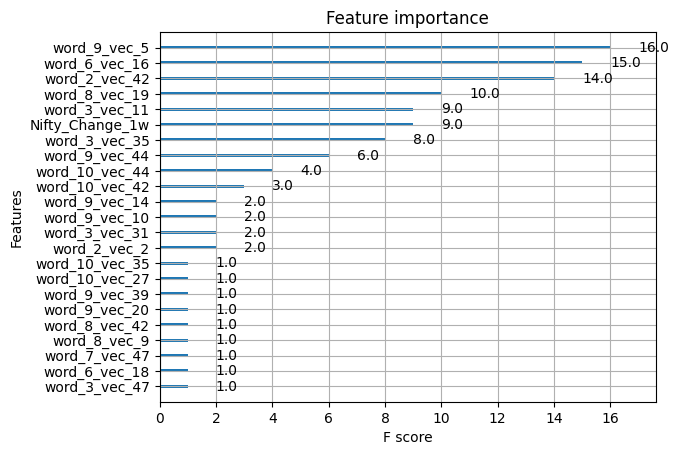

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optionally, you can plot feature importances
xgb.plot_importance(model)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Split data
X = final_df.drop(columns=['Target']).values
y = final_df['Target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Compute class weights manually
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build model
model = Sequential([
    Dense(128, input_dim=X.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.5168 - loss: 1.1895 - val_accuracy: 0.4444 - val_loss: 0.7123
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3976 - loss: 0.8264 - val_accuracy: 0.6667 - val_loss: 0.6522
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6522 - loss: 0.4462 - val_accuracy: 0.7778 - val_loss: 0.6141
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8171 - loss: 0.4177 - val_accuracy: 0.7778 - val_loss: 0.6033
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6487 - loss: 0.4508 - val_accuracy: 0.7778 - val_loss: 0.5982
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6308 - loss: 0.3760 - val_accuracy: 0.6667 - val_loss: 0.6033
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7737 - loss: 0.2829 - val_accuracy: 0.6667 - val_loss: 0.6071
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6788 - loss: 0.3910 - val_accuracy: 0.6667 - val_loss